In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_tools import PenalizedRegression as pr

from time import time

from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model

## Load and Split Data

In [2]:
data = datasets.load_breast_cancer(as_frame=False)
X = data["data"]
y = data["target"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.5, random_state=42)

## Data Pre-Processing

In [3]:
SS = preprocessing.StandardScaler()
SS.fit(X_train)
X_train_ss = SS.transform(X_train)
X_test_ss = SS.transform(X_test)

## Models
cv=3, since this is a small data-set

### l1

0.9955624355005159 0.9983084142748009


(<Figure size 864x288 with 2 Axes>,
 (<AxesSubplot:xlabel='log(C)', ylabel='Mean Coefficient'>,
  <AxesSubplot:xlabel='log(C)', ylabel='roc_auc'>))

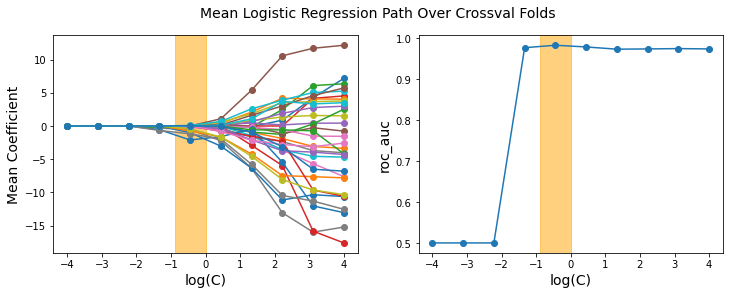

In [104]:
logistic_l1_cv = linear_model.LogisticRegressionCV(
    cv=3, penalty="l1", scoring="roc_auc", solver="liblinear", random_state=42, max_iter=1e4)
logistic_l1_cv.fit(X_train_ss, y_train)
print(logistic_l1_cv.score(X_train_ss, y_train), logistic_l1_cv.score(X_test_ss, y_test))
pr.plot_reg_path(logistic_l1_cv, figsize=[12,4], fontsize=14)

### l2

0.9952012383900929 0.9979264433045946


(<Figure size 864x288 with 2 Axes>,
 (<AxesSubplot:xlabel='log(C)', ylabel='Mean Coefficient'>,
  <AxesSubplot:xlabel='log(C)', ylabel='roc_auc'>))

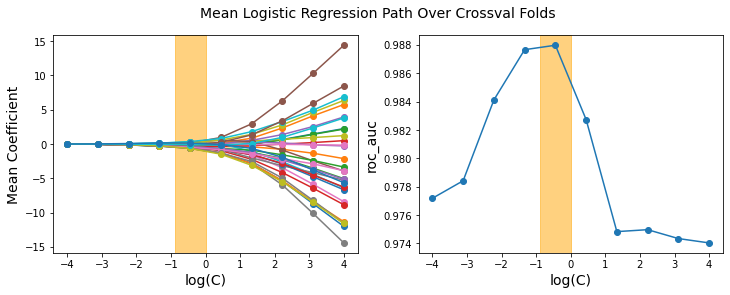

In [106]:
logistic_l2_cv = linear_model.LogisticRegressionCV(
    cv=3, penalty="l2", scoring="roc_auc", solver="liblinear", random_state=42, max_iter=1e4)
logistic_l2_cv.fit(X_train_ss, y_train)
print(logistic_l2_cv.score(X_train_ss, y_train), logistic_l2_cv.score(X_test_ss, y_test))
pr.plot_reg_path(logistic_l2_cv, figsize=[12,4], fontsize=14)

### elastic_net

In [121]:
logistic_elnet_cv = linear_model.LogisticRegressionCV(
    cv=3, penalty="elasticnet", l1_ratios=np.linspace(0,1,101), scoring="roc_auc", solver="saga", random_state=42, max_iter=1e4)
logistic_elnet_cv.fit(X_train_ss, y_train)
logistic_elnet_cv.score(X_train_ss, y_train), logistic_elnet_cv.score(X_test_ss, y_test)

(0.9925696594427245, 0.9981992797118848)

Text(0, 0.5, 'roc_auc')

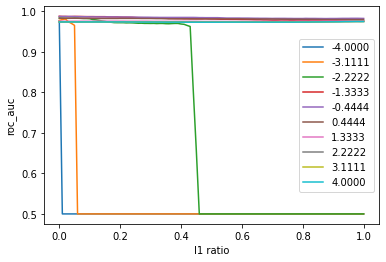

In [128]:
for c, series in zip(logistic_elnet_cv.Cs_, logistic_elnet_cv.scores_[1].mean(axis=0)):
    plt.plot(logistic_elnet_cv.l1_ratios, series, label="{0:.4f}".format(np.log10(c)))
plt.legend()
plt.xlabel("l1 ratio")
plt.ylabel(logistic_elnet_cv.scoring)

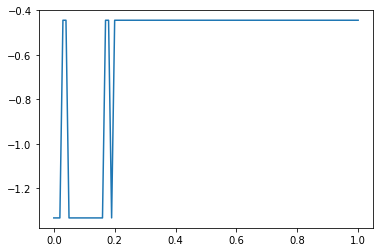

In [129]:
plt.plot(logistic_elnet_cv.l1_ratios, np.log10(logistic_elnet_cv.Cs_[logistic_elnet_cv.scores_[1].mean(axis=0).argmax(axis=0)]))

In [130]:
logistic_elnet_cv.scores_[1].max()

0.9957706766917294

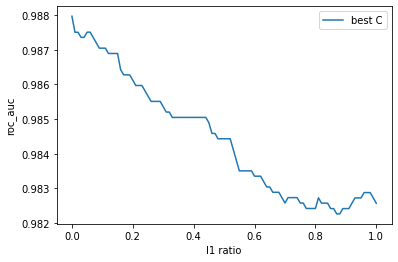

In [131]:
plt.plot(logistic_elnet_cv.l1_ratios, logistic_elnet_cv.scores_[1].mean(axis=0).max(axis=0), label="best C")
plt.xlabel("l1 ratio")
plt.ylabel(logistic_elnet_cv.scoring)
plt.legend()

Text(0, 0.5, 'roc_auc')

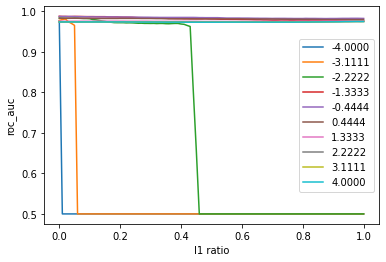

In [132]:
for c, series in zip(logistic_elnet_cv.Cs_, logistic_elnet_cv.scores_[1].mean(axis=0)):
    plt.plot(logistic_elnet_cv.l1_ratios, series, label="{0:.4f}".format(np.log10(c)))
plt.legend()
plt.xlabel("l1 ratio")
plt.ylabel(logistic_elnet_cv.scoring)

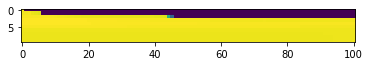

In [127]:
plt.imshow(logistic_elnet_cv.scores_[1].mean(axis=0))